In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_train  = pd.read_csv(r'data\train.csv')
df_test  = pd.read_csv(r'data\test.csv')
df_features  = pd.read_csv(r'data\features.csv')
df_stores  = pd.read_csv(r'data\stores.csv')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [87]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [88]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


1. megre into one dataset

In [89]:
train_data = df_train.merge(df_features, on = ['Store', 'Date'], how = 'inner').merge(df_stores, on = ['Store'], 
                                                                                    how = 'inner')
test_data = df_test.merge(df_features, on = ['Store', 'Date'], how = 'inner').merge(df_stores, on = ['Store'], 
                                                                                    how = 'inner')

train_data.drop('IsHoliday_y', axis = 1, inplace = True)

test_data.drop('IsHoliday_y', axis = 1, inplace = True)

ordered_train = ['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday_x', 'Weekly_Sales', 'Temperature',
       'Fuel_Price',  'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']

ordered_test = ['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday_x', 'Temperature',
       'Fuel_Price',  'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']


train_data = train_data[ordered_train]
test_data = test_data[ordered_test]

train_data.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True, errors = 'raise')
test_data.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True, errors = 'raise')

train_data.head()

,Store,Dept,Type,Size,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,A,151315,2010-02-05,False,24924.50,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN
1,1,1,A,151315,2010-02-12,True,46039.49,38.51,2.548,211.242170,8.106,NaN,NaN,NaN,NaN,NaN
2,1,1,A,151315,2010-02-19,False,41595.55,39.93,2.514,211.289143,8.106,NaN,NaN,NaN,NaN,NaN
3,1,1,A,151315,2010-02-26,False,19403.54,46.63,2.561,211.319643,8.106,NaN,NaN,NaN,NaN,NaN
4,1,1,A,151315,2010-03-05,False,21827.90,46.50,2.625,211.350143,8.106,NaN,NaN,NaN,NaN,NaN


In [90]:
train_data.columns

Index(['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],
      dtype='object')

In [91]:
test_data.columns

Index(['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5'],
      dtype='object')

## 1. cleaning data

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Type          421570 non-null  object 
 3   Size          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   IsHoliday     421570 non-null  bool   
 6   Weekly_Sales  421570 non-null  float64
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  MarkDown1     150681 non-null  float64
 12  MarkDown2     111248 non-null  float64
 13  MarkDown3     137091 non-null  float64
 14  MarkDown4     134967 non-null  float64
 15  MarkDown5     151432 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Type          115064 non-null  object 
 3   Size          115064 non-null  int64  
 4   Date          115064 non-null  object 
 5   IsHoliday     115064 non-null  bool   
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   CPI           76902 non-null   float64
 9   Unemployment  76902 non-null   float64
 10  MarkDown1     114915 non-null  float64
 11  MarkDown2     86437 non-null   float64
 12  MarkDown3     105235 non-null  float64
 13  MarkDown4     102176 non-null  float64
 14  MarkDown5     115064 non-null  float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [94]:
train_data.isnull().sum()/train_data.shape[0]

Store           0.000000
Dept            0.000000
Type            0.000000
Size            0.000000
Date            0.000000
IsHoliday       0.000000
Weekly_Sales    0.000000
Temperature     0.000000
Fuel_Price      0.000000
CPI             0.000000
Unemployment    0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
dtype: float64

In [95]:
test_data.isnull().sum()/test_data.shape[0]

Store           0.000000
Dept            0.000000
Type            0.000000
Size            0.000000
Date            0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
CPI             0.331659
Unemployment    0.331659
MarkDown1       0.001295
MarkDown2       0.248792
MarkDown3       0.085422
MarkDown4       0.112007
MarkDown5       0.000000
dtype: float64

In [96]:
train_data['MarkDown1'].dropna()

92        10382.90
93         6074.12
94          410.31
95         5629.51
96         4640.65
            ...   
421565     4556.61
421566     5046.74
421567     1956.28
421568     2004.02
421569     4018.91
Name: MarkDown1, Length: 150681, dtype: float64

MarkDown1 , MarkDown2 , MarkDown3 , MarkDown4 , MarkDown5 : have alot of nulls 
- markdowns are Anonymized features by the walmart related to promotions
- values of markdown may be related to returned money of it
- so null markdown means there ware no promotions for this week
- so it will be logical to fill it's null values with zero as a zero returned value

In [97]:
train_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = train_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
train_data.isnull().sum()/train_data.shape[0]

Store           0.0
Dept            0.0
Type            0.0
Size            0.0
Date            0.0
IsHoliday       0.0
Weekly_Sales    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
dtype: float64

In [98]:
test_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = test_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
test_data.isnull().sum()/test_data.shape[0]

Store           0.000000
Dept            0.000000
Type            0.000000
Size            0.000000
Date            0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
CPI             0.331659
Unemployment    0.331659
MarkDown1       0.000000
MarkDown2       0.000000
MarkDown3       0.000000
MarkDown4       0.000000
MarkDown5       0.000000
dtype: float64

In [99]:
train_data.duplicated().sum()

np.int64(0)

In [100]:
train_data.describe()

,Store,Dept,Size,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,136727.915739,15981.258123,60.090059,3.361027,171.201947,7.960289,2590.074819,879.974298,468.087665,1083.132268,1662.772385
std,12.785297,30.492054,60980.583328,22711.183519,18.447931,0.458515,39.159276,1.863296,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321
min,1.000000,1.000000,34875.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,0.000000,-265.760000,-29.100000,0.000000,0.000000
25%,11.000000,18.000000,93638.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,140167.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,74.000000,202505.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,2809.050000,2.200000,4.540000,425.290000,2168.040000
max,45.000000,99.000000,219622.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


std of weakly_sales is high compared to the mean this may be because of outliers

## 2.EDA

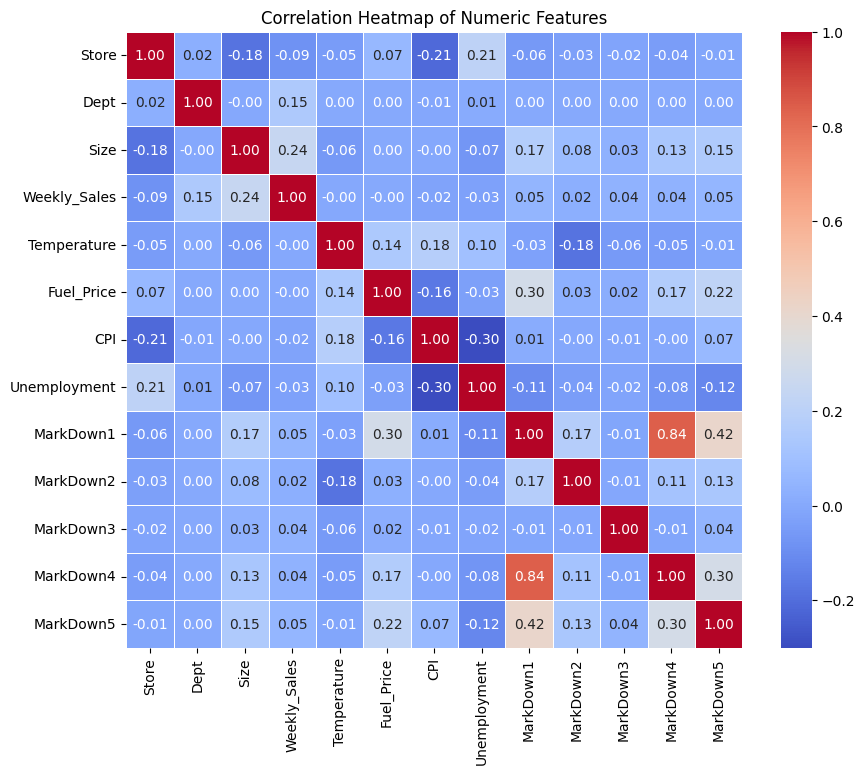

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    train_data.select_dtypes('number','bool').corr(),
    annot=True,
    cmap='coolwarm',    
    fmt=".2f",             
    linewidths=0.5,        
    square=True            
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

I care about weekly_sales

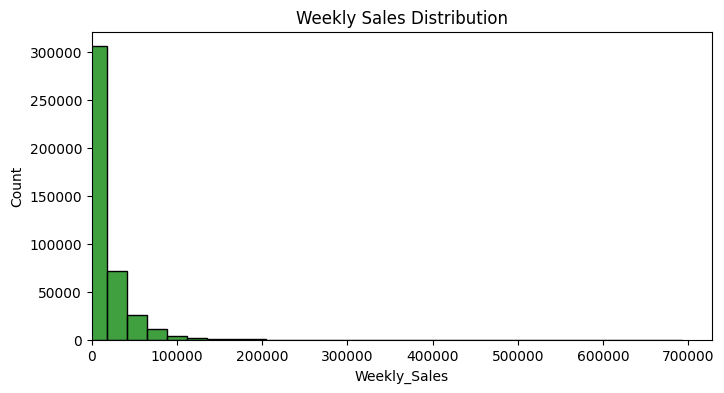

In [102]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Weekly_Sales'], bins=30, color='green')
plt.title('Weekly Sales Distribution')
plt.xlim(0)
plt.grid(False)
plt.show()

we can see some ouliers here 

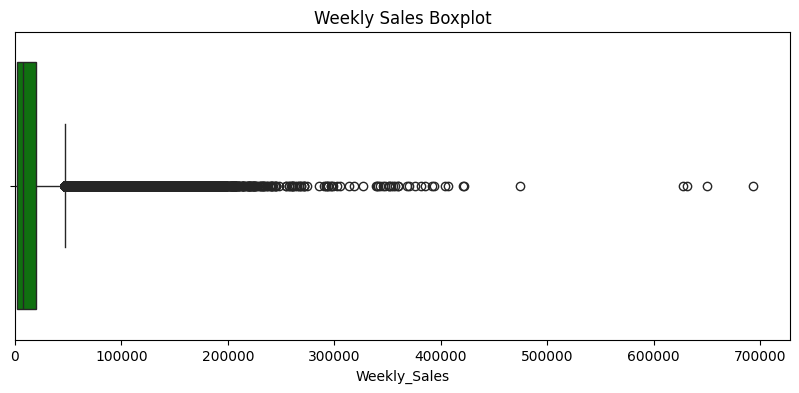

In [103]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=train_data, x='Weekly_Sales', color='green')
plt.title('Weekly Sales Boxplot')
plt.xlim(0)
plt.grid(False)
plt.show()

we have to deal with outliers carefully

removing outliers

In [104]:
z_score =  ( (train_data['Weekly_Sales'] - train_data['Weekly_Sales'].mean() ) / train_data['Weekly_Sales'].std())
z_score

0         0.393781
1         1.323499
2         1.127827
3         0.150687
4         0.257434
            ...   
421565   -0.681289
421566   -0.676018
421567   -0.656956
421568   -0.670209
421569   -0.656261
Name: Weekly_Sales, Length: 421570, dtype: float64

In [105]:
print("number of above 3 z score : ",(z_score.values>3).sum())

number of above 3 z score :  8848


In [106]:
print("number of less than -3 z score : ",(z_score.values<-3).sum())

number of less than -3 z score :  0


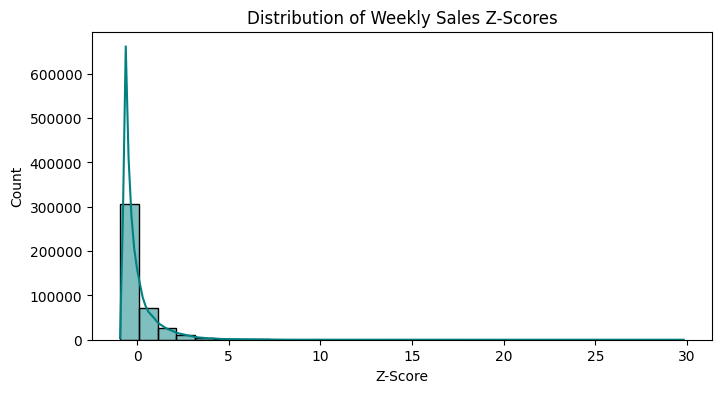

In [107]:
plt.figure(figsize=(8, 4))
sns.histplot(z_score, bins=30, kde=True, color='teal')
plt.title('Distribution of Weekly Sales Z-Scores')
plt.xlabel('Z-Score')
plt.grid(False)
plt.show()

In [108]:
train_data = train_data[ z_score <= 3 ]
train_data

,Store,Dept,Type,Size,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,A,151315,2010-02-05,False,24924.50,42.31,2.572,211.096358,8.106,0.00,0.00,0.00,0.00,0.00
1,1,1,A,151315,2010-02-12,True,46039.49,38.51,2.548,211.242170,8.106,0.00,0.00,0.00,0.00,0.00
2,1,1,A,151315,2010-02-19,False,41595.55,39.93,2.514,211.289143,8.106,0.00,0.00,0.00,0.00,0.00
3,1,1,A,151315,2010-02-26,False,19403.54,46.63,2.561,211.319643,8.106,0.00,0.00,0.00,0.00,0.00
4,1,1,A,151315,2010-03-05,False,21827.90,46.50,2.625,211.350143,8.106,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,B,118221,2012-09-28,False,508.37,64.88,3.997,192.013558,8.684,4556.61,20.64,1.50,1601.01,3288.25
421566,45,98,B,118221,2012-10-05,False,628.10,64.89,3.985,192.170412,8.667,5046.74,0.00,18.82,2253.43,2340.01
421567,45,98,B,118221,2012-10-12,False,1061.02,54.47,4.000,192.327265,8.667,1956.28,0.00,7.89,599.32,3990.54
421568,45,98,B,118221,2012-10-19,False,760.01,56.47,3.969,192.330854,8.667,2004.02,0.00,3.18,437.73,1537.49


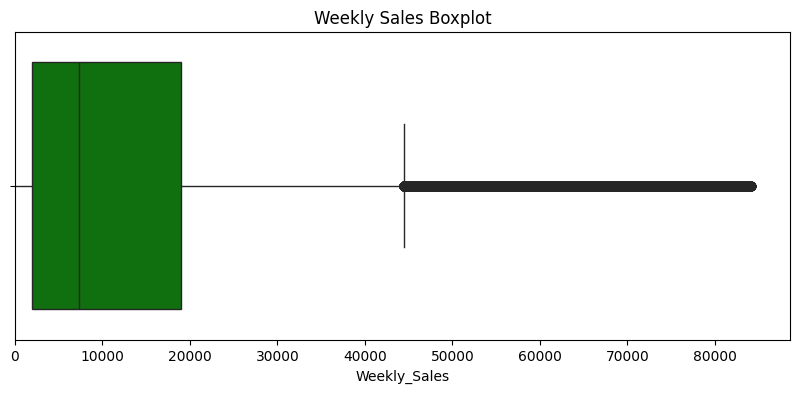

In [109]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=train_data, x='Weekly_Sales', color='green')
plt.title('Weekly Sales Boxplot')
plt.xlim(0)
plt.grid(False)
plt.show()

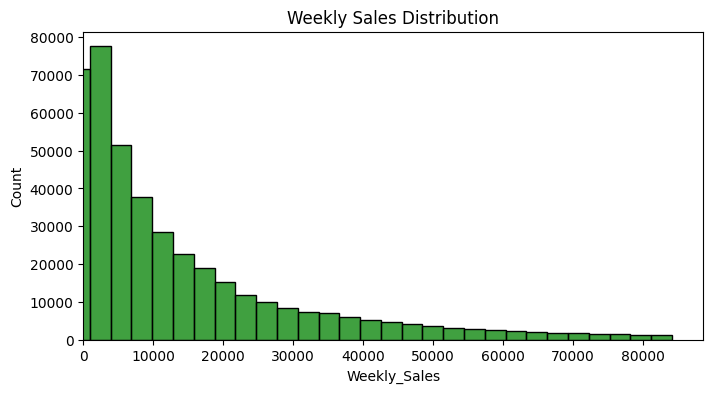

In [110]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Weekly_Sales'], bins=30, color='green')
plt.title('Weekly Sales Distribution')
plt.xlim(0)
plt.grid(False)
plt.show()

Cat data : 

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\2136715729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train_data['Type'], palette = 'summer', ax = ax1)
C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\2136715729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'Dept', data = train_data, palette = 'flare_r', ax = ax2)


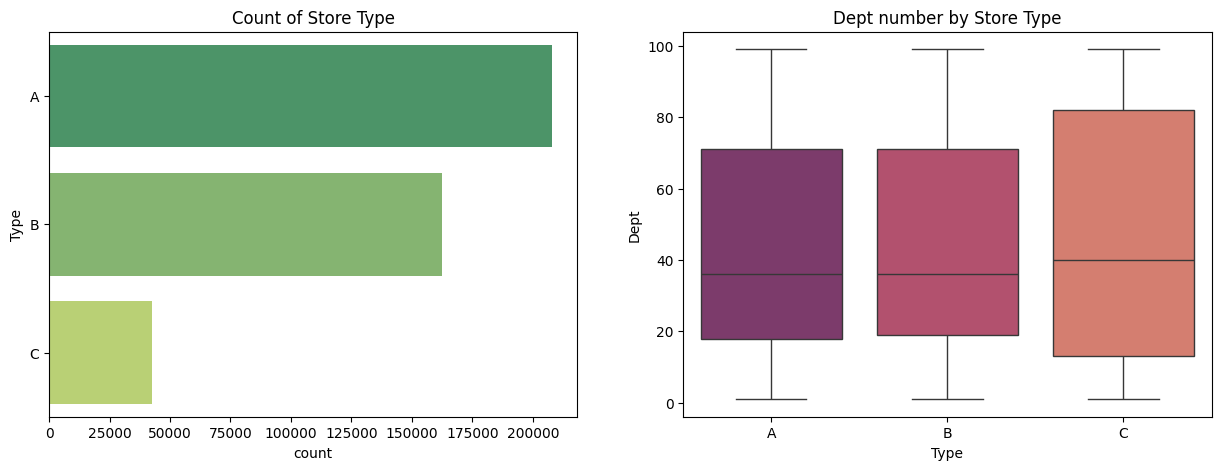

In [111]:
fig, (ax1, ax2) = plt.subplots(sharex = False, sharey = False, ncols = 2, figsize = (15, 5))
 
sns.countplot(train_data['Type'], palette = 'summer', ax = ax1)

ax1.grid(False)
ax1.set_title('Count of Store Type');

sns.boxplot(x = 'Type', y = 'Dept', data = train_data, palette = 'flare_r', ax = ax2)

ax2.grid(False)
ax2.set_title('Dept number by Store Type');

A & B are the most common types

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

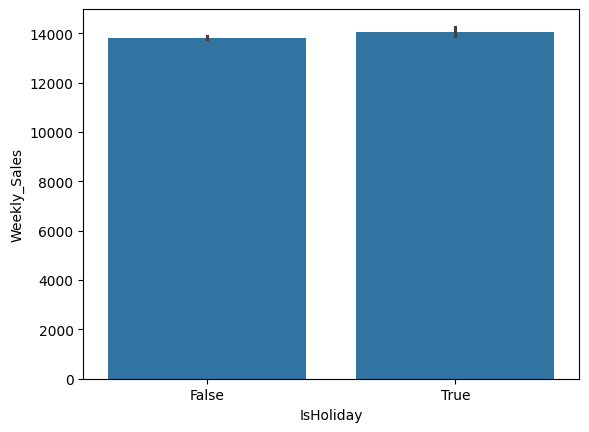

In [112]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_data)

In [113]:
df_holiday = train_data.loc[train_data['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

🗓️ Breakdown by date and event

- 2010-02-12    |  2010	 |  Super Bowl / Valentine’s Week	High demand for food, gifts, party items
- 2010-09-10	|  2010	 |  Labor Day Week	Preceding or following U.S. Labor Day weekend
- 2010-11-26	|  2010	 |  Black Friday (Thanksgiving week)	Major spike in retail sales
- 2010-12-31	|  2010	 |  New Year’s Week	Increased sales before New Year
- 2011-02-11	|  2011	 |  Super Bowl / Valentine’s Week	Same seasonal pattern as 2010
- 2011-09-09	|  2011	 |  Labor Day Week	Same pattern as 2010
- 2011-11-25	|  2011	 |  Black Friday (Thanksgiving week)	High sales
- 2011-12-30	|  2011	 |  New Year’s Week	End-of-year sales
- 2012-02-10	|  2012	 |  Super Bowl / Valentine’s Week	Early February peak
- 2012-09-07	|  2012	 |  Labor Day Week	Early September holiday

numeric features :

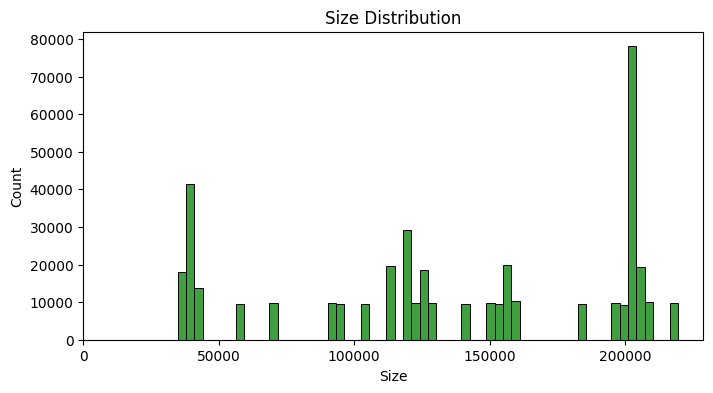

In [114]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Size'], bins=60, color='green')
plt.title('Size Distribution')
plt.xlim(0)
plt.grid(False)
plt.show()

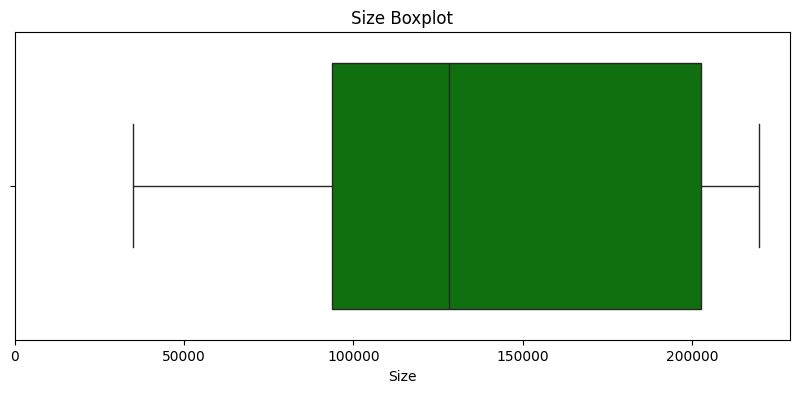

In [115]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=train_data, x='Size', color='green')
plt.title('Size Boxplot')
plt.xlim(0)
plt.grid(False)
plt.show()

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\3456432693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Temperature'], kde = False, ax = ax1, color = '#A1CA24')


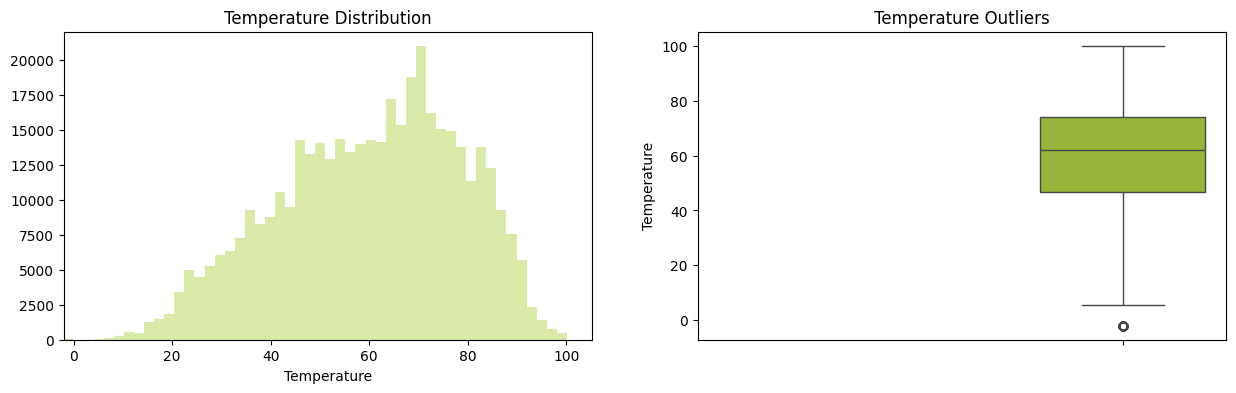

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(train_data['Temperature'], kde = False, ax = ax1, color = '#A1CA24')

ax1.grid(False)
ax1.set_title('Temperature Distribution')
ax1.set_xlim(train_data['Temperature'].min())

sns.boxplot(train_data['Temperature'], ax = ax2, color = '#A1CA24')

ax2.grid(False)
ax2.set_title('Temperature Outliers')
ax2.set_xlim(train_data['Temperature'].min());

normal

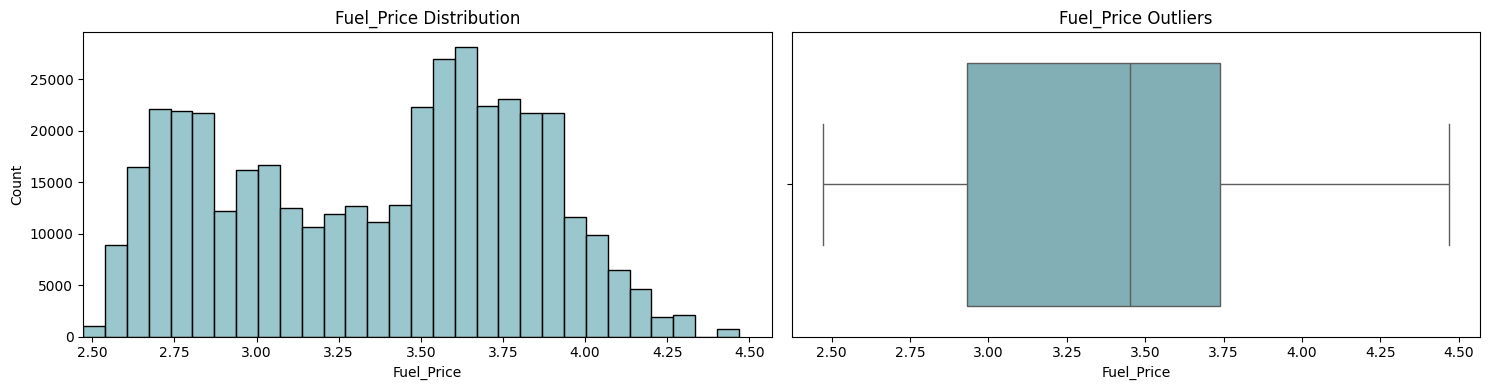

In [117]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# ✅ Replace deprecated distplot with histplot
sns.histplot(data=train_data, x='Fuel_Price', bins=30, kde=False, color='#79B5BD', ax=ax1)

ax1.grid(False)
ax1.set_title('Fuel_Price Distribution')
ax1.set_xlim(train_data['Fuel_Price'].min())

# ✅ Correct way to call boxplot (pass x=)
sns.boxplot(x=train_data['Fuel_Price'], ax=ax2, color='#79B5BD')

ax2.grid(False)
ax2.set_title('Fuel_Price Outliers')
ax2.set_xlim(train_data['Fuel_Price'].min() - 0.1)

plt.tight_layout()
plt.show()

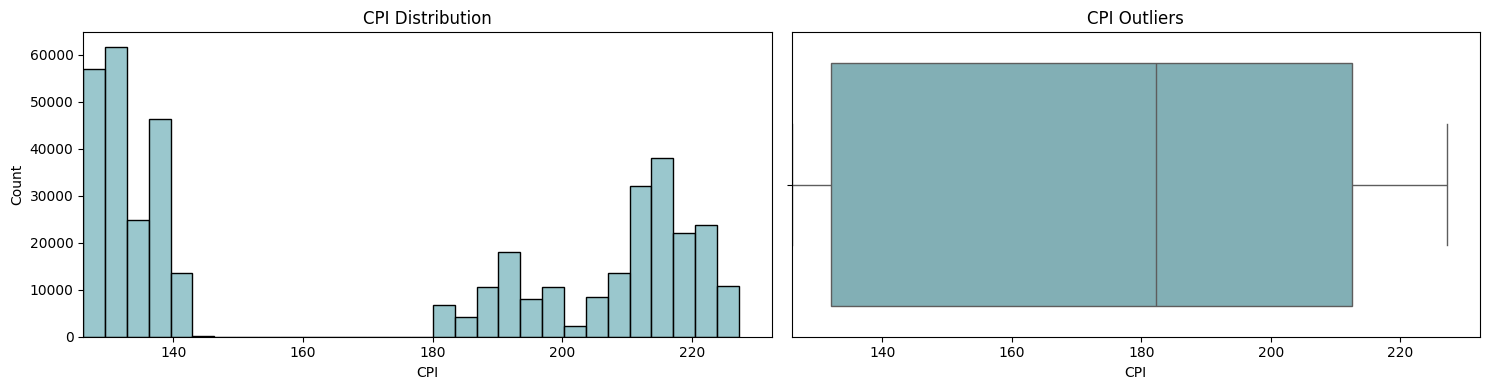

In [118]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# ✅ Replace deprecated distplot with histplot
sns.histplot(data=train_data, x='CPI', bins=30, kde=False, color='#79B5BD', ax=ax1)

ax1.grid(False)
ax1.set_title('CPI Distribution')
ax1.set_xlim(train_data['CPI'].min())

# ✅ Correct way to call boxplot (pass x=)
sns.boxplot(x=train_data['CPI'], ax=ax2, color='#79B5BD')

ax2.grid(False)
ax2.set_title('CPI Outliers')
ax2.set_xlim(train_data['CPI'].min() - 0.1)

plt.tight_layout()
plt.show()

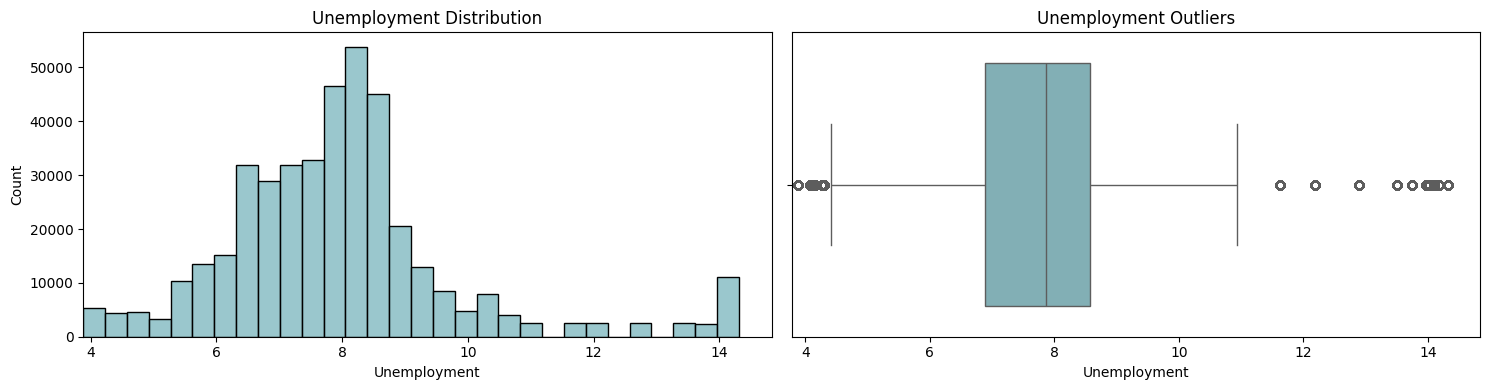

In [119]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# ✅ Replace deprecated distplot with histplot
sns.histplot(data=train_data, x='Unemployment', bins=30, kde=False, color='#79B5BD', ax=ax1)

ax1.grid(False)
ax1.set_title('Unemployment Distribution')
ax1.set_xlim(train_data['Unemployment'].min())

# ✅ Correct way to call boxplot (pass x=)
sns.boxplot(x=train_data['Unemployment'], ax=ax2, color='#79B5BD')

ax2.grid(False)
ax2.set_title('Unemployment Outliers')
ax2.set_xlim(train_data['Unemployment'].min() - 0.1)

plt.tight_layout()
plt.show()

has some outliers , i think no need to remove them

deeper into our target (weekly sales)

In [120]:
train_data.head()

,Store,Dept,Type,Size,Date,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,A,151315,2010-02-05,False,24924.50,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0
1,1,1,A,151315,2010-02-12,True,46039.49,38.51,2.548,211.242170,8.106,0.0,0.0,0.0,0.0,0.0
2,1,1,A,151315,2010-02-19,False,41595.55,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,0.0
3,1,1,A,151315,2010-02-26,False,19403.54,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,0.0
4,1,1,A,151315,2010-03-05,False,21827.90,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0.0


Weekly_Sales vs. Store

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\4173478270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Store', y = 'Weekly_Sales', data = train_data, palette = 'viridis')


(0.0, 80000.0)

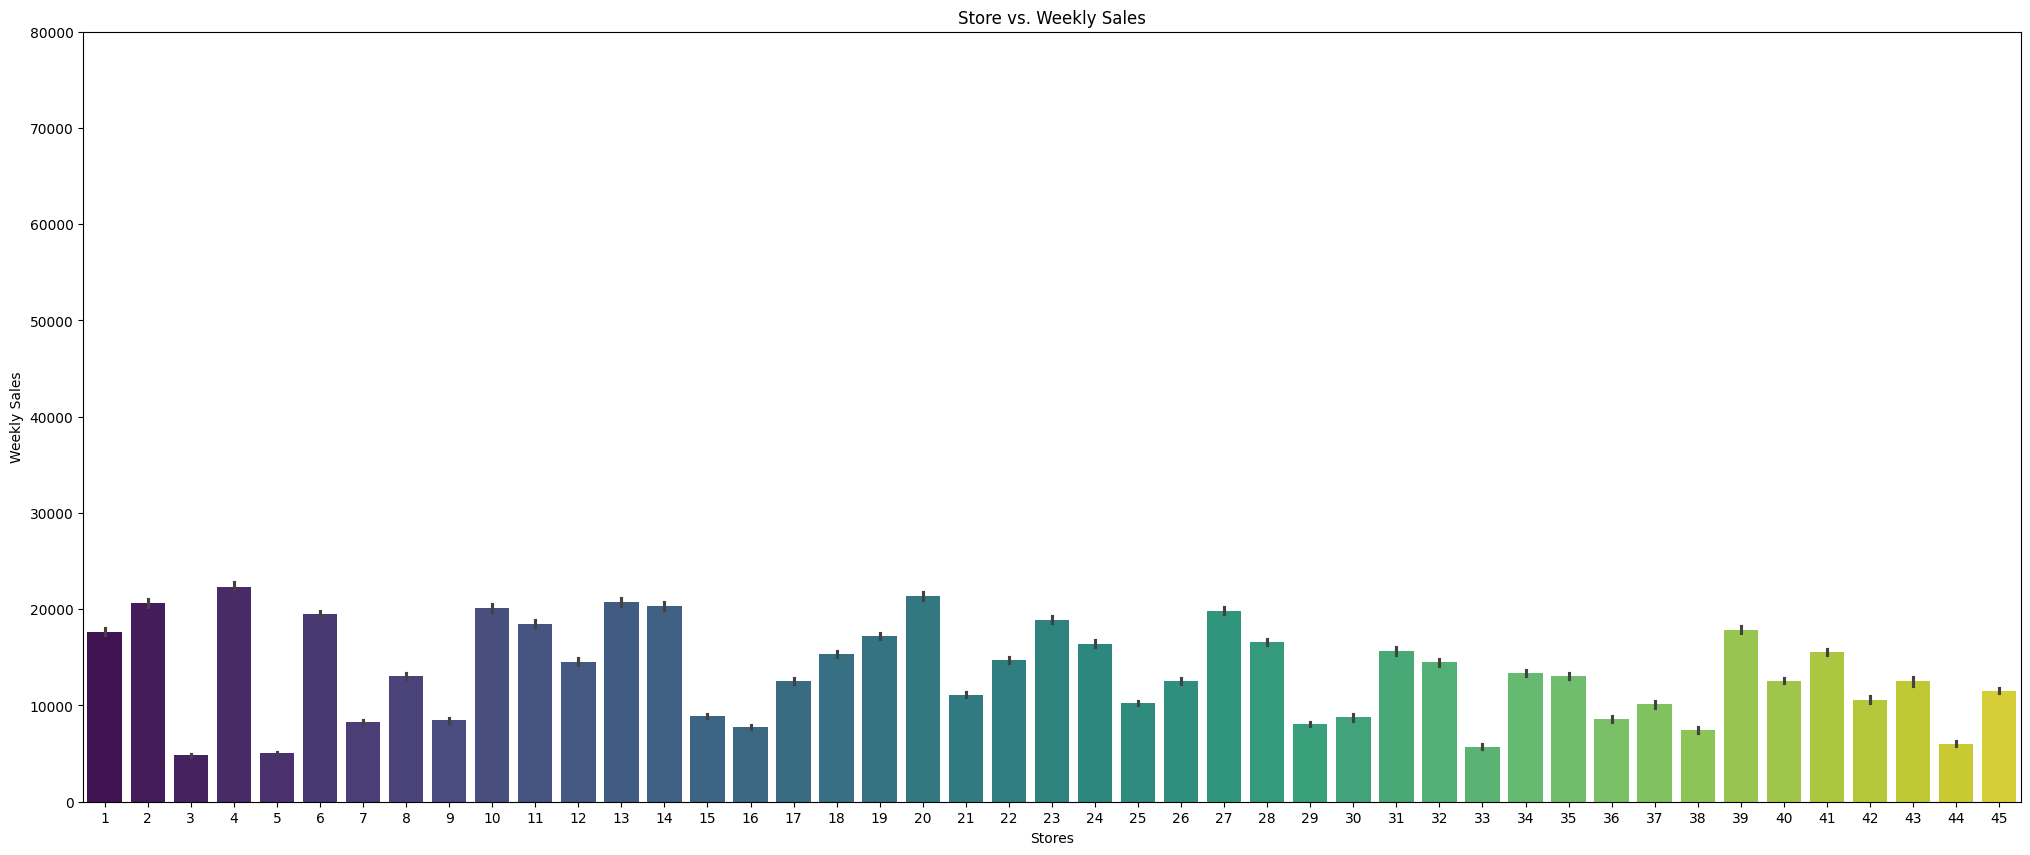

In [121]:
plt.figure(figsize = (25, 10))

sns.barplot(x = 'Store', y = 'Weekly_Sales', data = train_data, palette = 'viridis')

plt.grid(False)
plt.title('Store vs. Weekly Sales')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.ylim(0, 80_000)

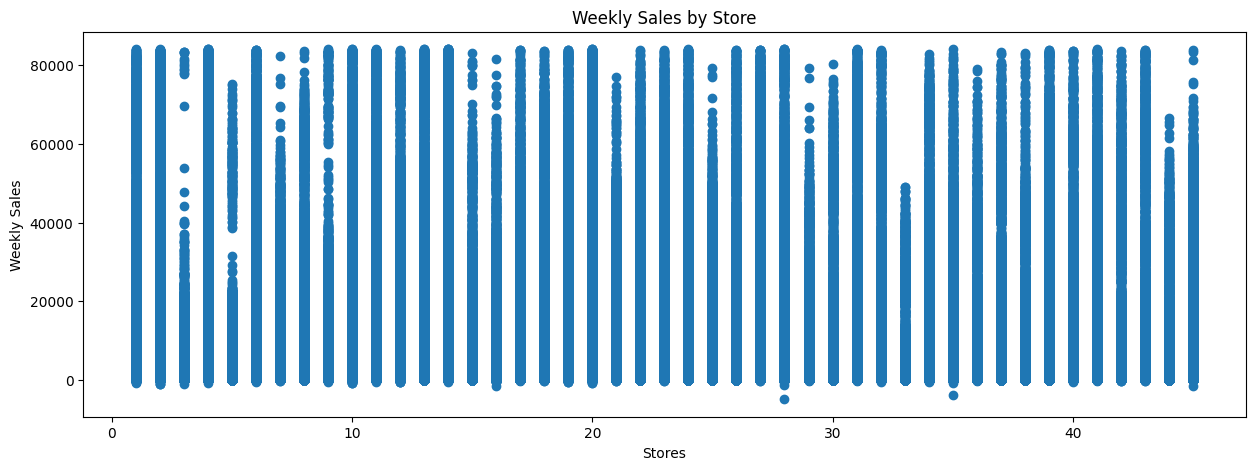

In [122]:
x = train_data['Store']
y = train_data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

we have 45 store , distributions seems normal , increases and decreases in normal ways

Weekly_Sales vs. Deps

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\3886808027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = train_data, palette = 'viridis')


(0.0, 80000.0)

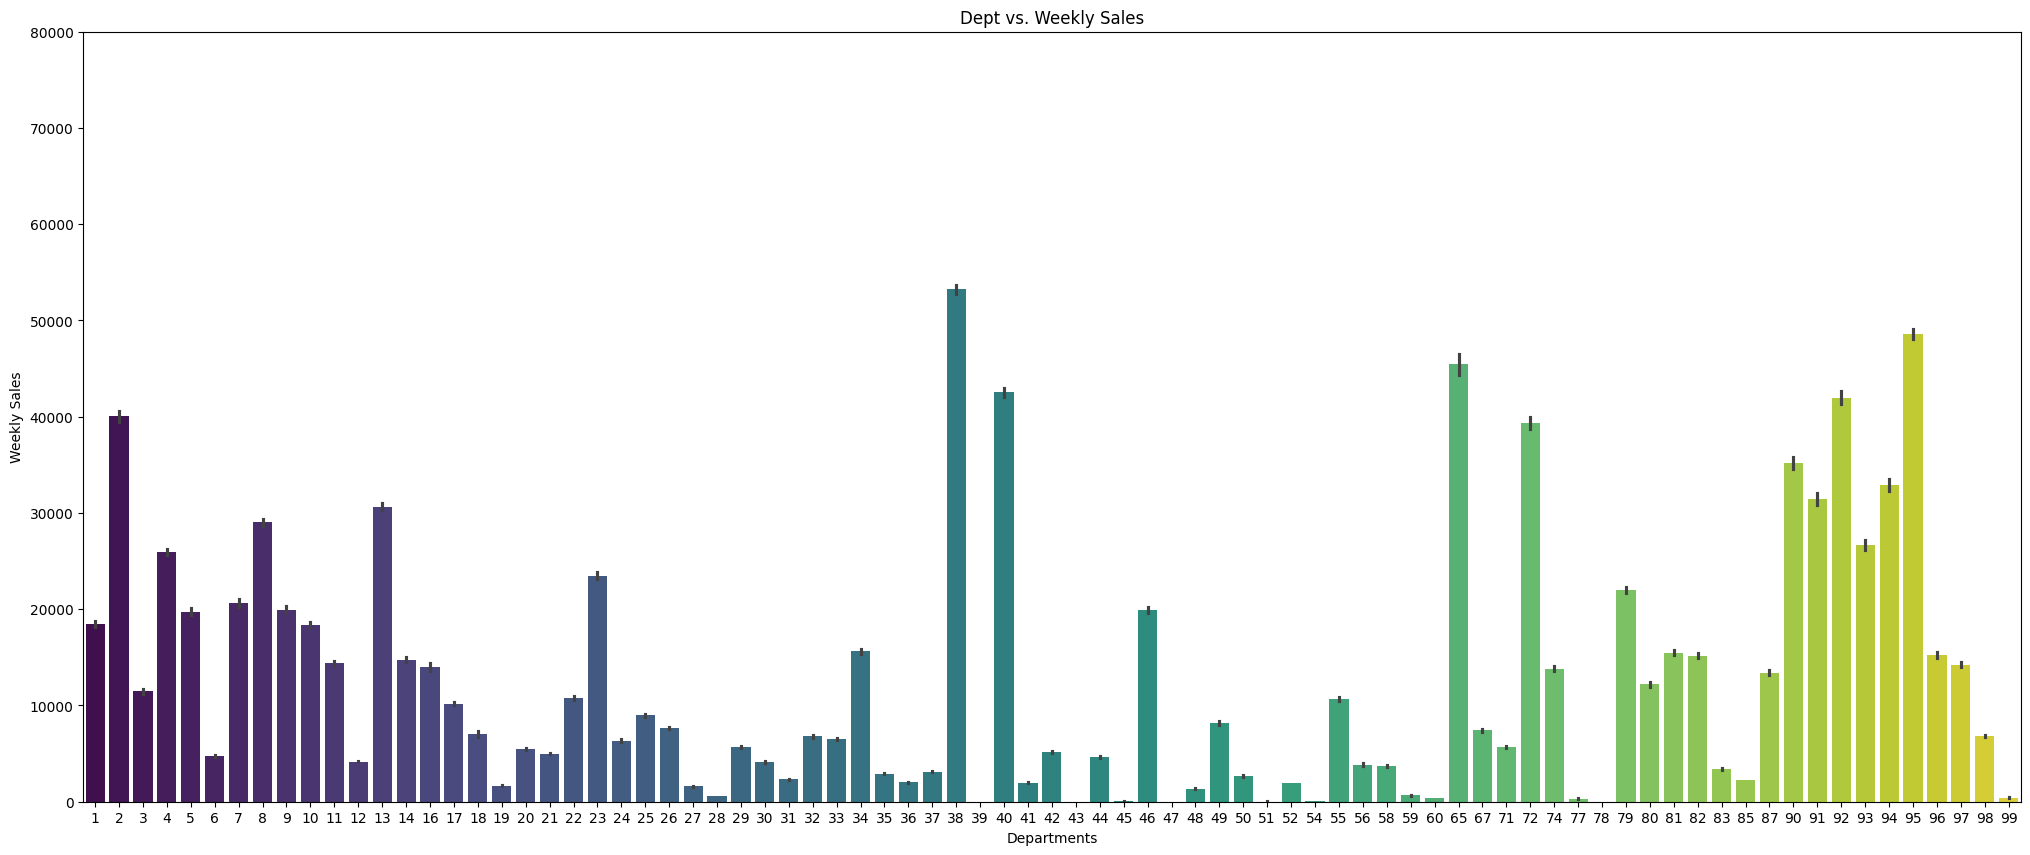

In [123]:
plt.figure(figsize = (25, 10))

sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = train_data, palette = 'viridis')

plt.grid(False)
plt.title('Dept vs. Weekly Sales')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.ylim(0, 80_000)

some deps are very high , while others are almost zero

Weekly_Sales vs. Type

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\1200686310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = train_data, palette = 'nipy_spectral_r')


(-5988.94, 88567.866)

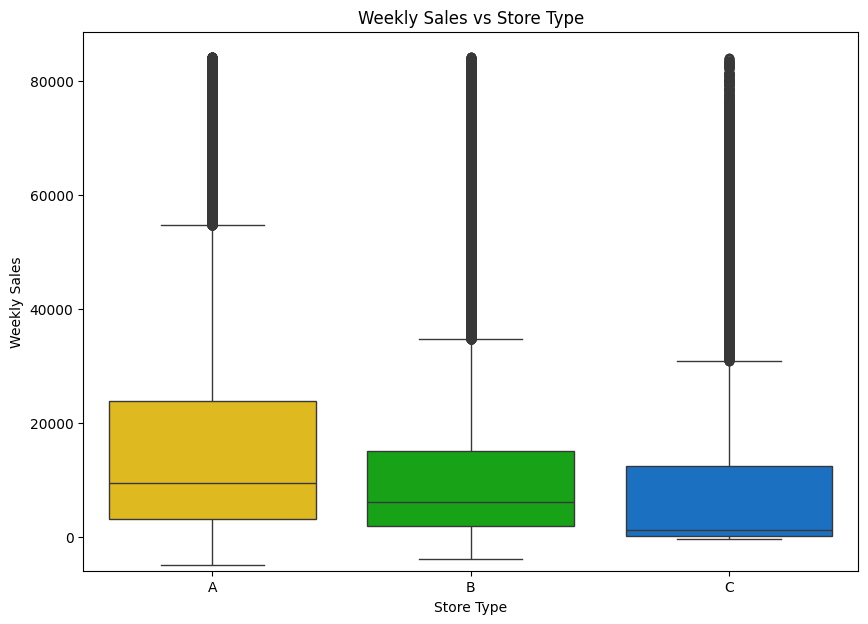

In [124]:
plt.figure(figsize = (10, 7))

sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = train_data, palette = 'nipy_spectral_r')

plt.grid(False)
plt.title('Weekly Sales vs Store Type')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Type')
plt.ylim(train_data['Weekly_Sales'].min() - 1000)

Mean sales are higher in Type A stores than Type B and C, this is probably because the count of stores. All of the stores type have outliers which is commom when dealing with timeseries because of holidays, offers, sales and advertising projects.

Convert to datetime

In [125]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

train_data['week'] = train_data['Date'].dt.isocalendar().week 
train_data['month'] = train_data['Date'].dt.month
train_data['year'] = train_data['Date'].dt.year

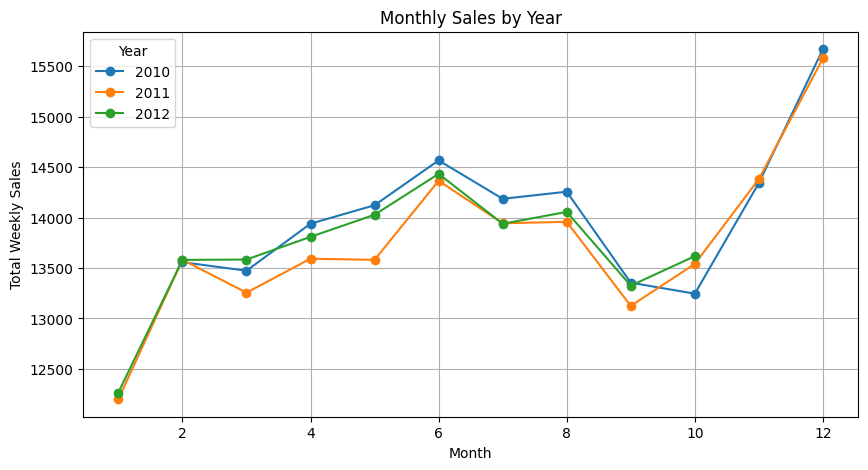

In [126]:
monthly_sales = pd.pivot_table(
    train_data,
    values="Weekly_Sales",
    index="month",
    columns="year",
    aggfunc='mean' 
)

# Plot
monthly_sales.plot(figsize=(10, 5), marker='o')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Year')
plt.show()

in the 3 years : they reach the peek at the june , then it starts to decrease till almost october , before increasing back till the end of the year

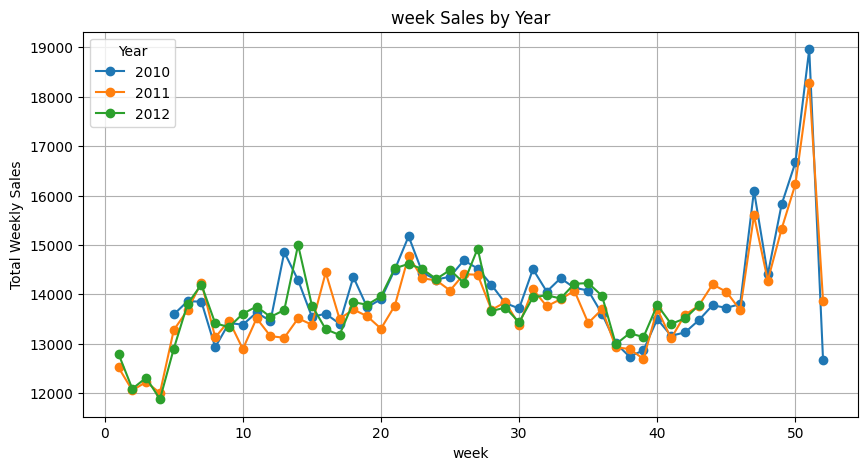

In [127]:
weekly_sales = pd.pivot_table(
    train_data,
    values="Weekly_Sales",
    index="week",
    columns="year",
    aggfunc='mean' 
)

# Plot
weekly_sales.plot(figsize=(10, 5), marker='o')
plt.title('week Sales by Year')
plt.xlabel('week')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Year')
plt.show()

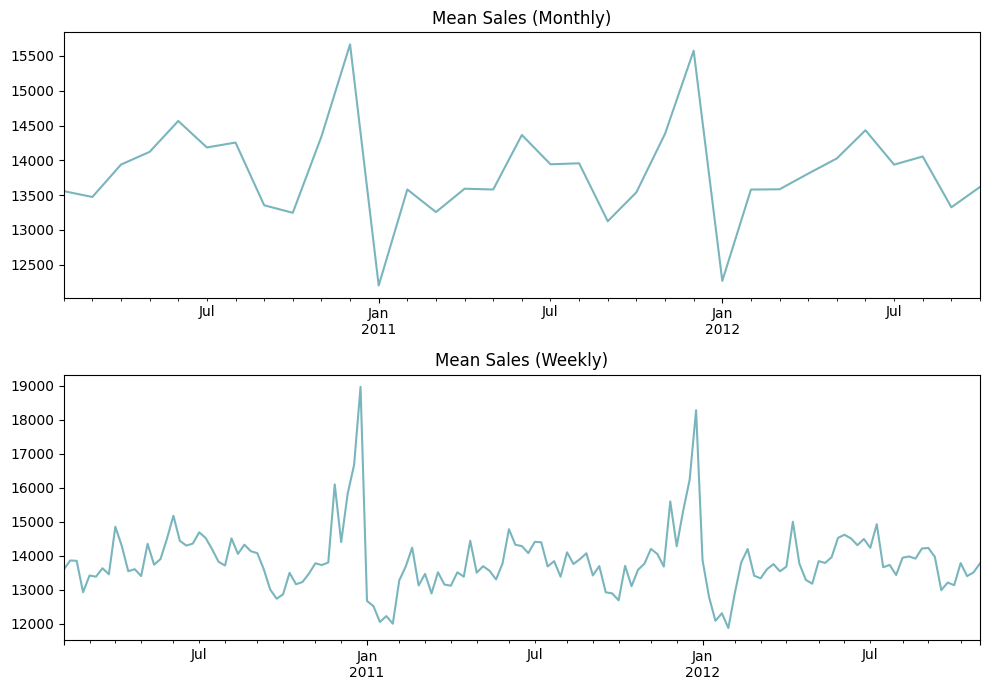

In [128]:
# Ensure 'Date' column is a datetime index
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data = train_data.set_index('Date')  # resample needs Date as the index

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), sharex=False)

# 1️⃣ Monthly mean sales
train_data.resample('MS').mean(numeric_only=True)['Weekly_Sales'].plot(ax=ax1, color='#79B5BD')
ax1.set_xlabel('')
ax1.set_title('Mean Sales (Monthly)')
ax1.grid(False)

# 2️⃣ Weekly mean sales
train_data.resample('W').mean(numeric_only=True)['Weekly_Sales'].plot(ax=ax2, color='#79B5BD')
ax2.set_xlabel('')
ax2.set_title('Mean Sales (Weekly)')
ax2.grid(False)

plt.tight_layout()
plt.show()

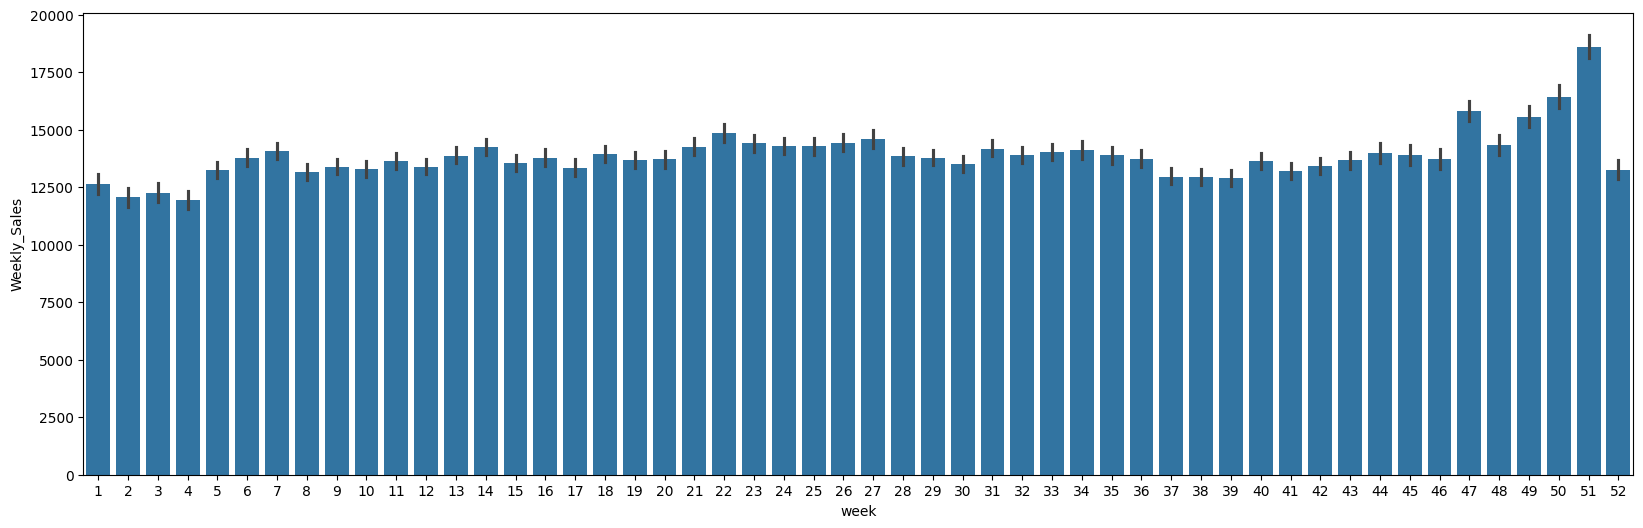

In [129]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=train_data)

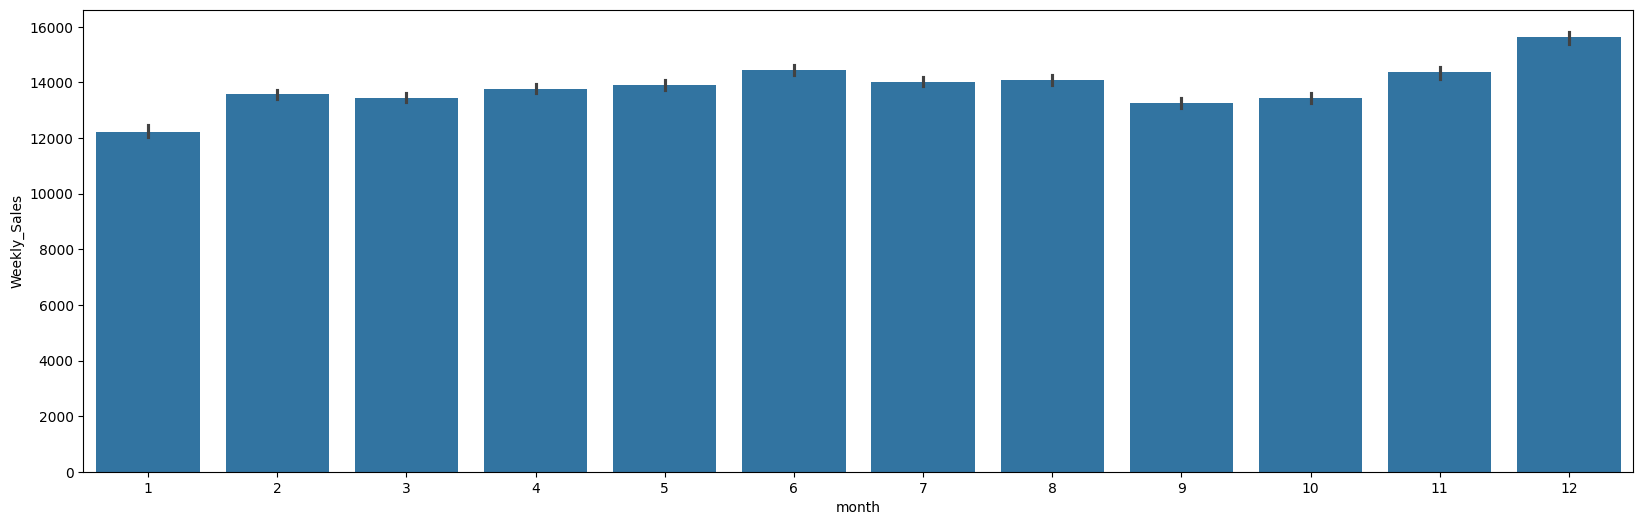

In [130]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='month', y='Weekly_Sales', data=train_data)

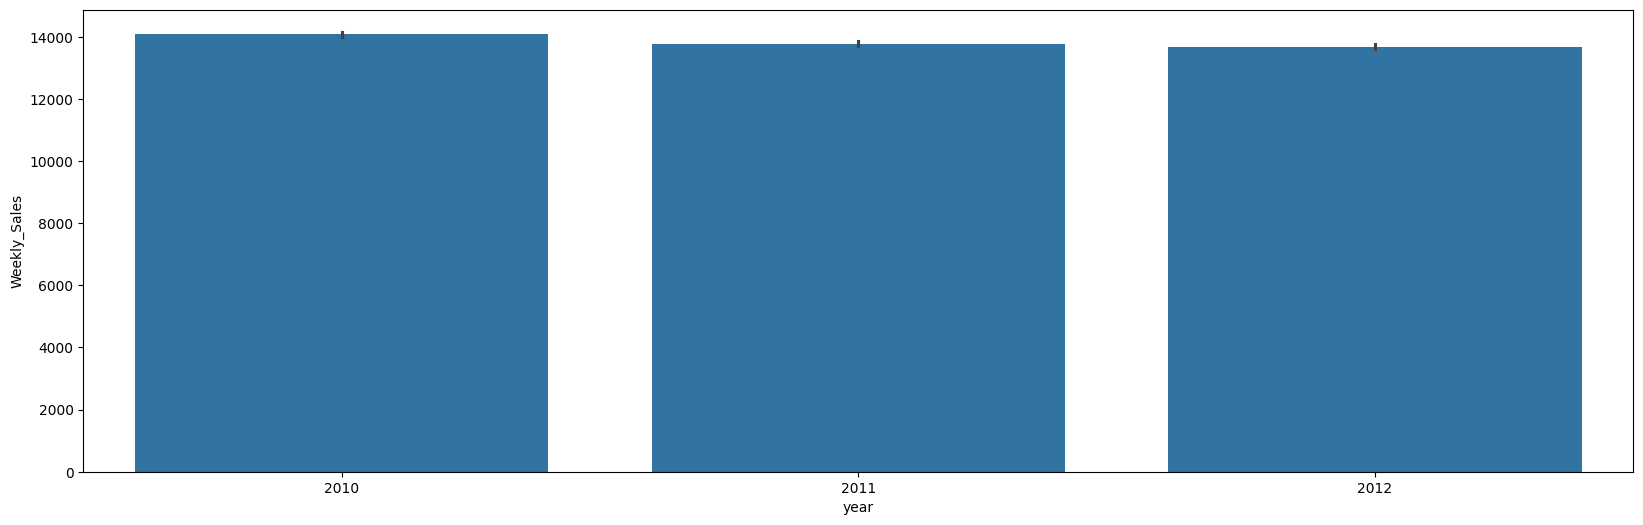

In [131]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='year', y='Weekly_Sales', data=train_data)

Weekly_Sales vs. Temperature

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\1364820312.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y = 'Weekly_Sales', x = 'Temperature', data = train_data, ci = None, color = 'green')


(-2.06, 100.14)

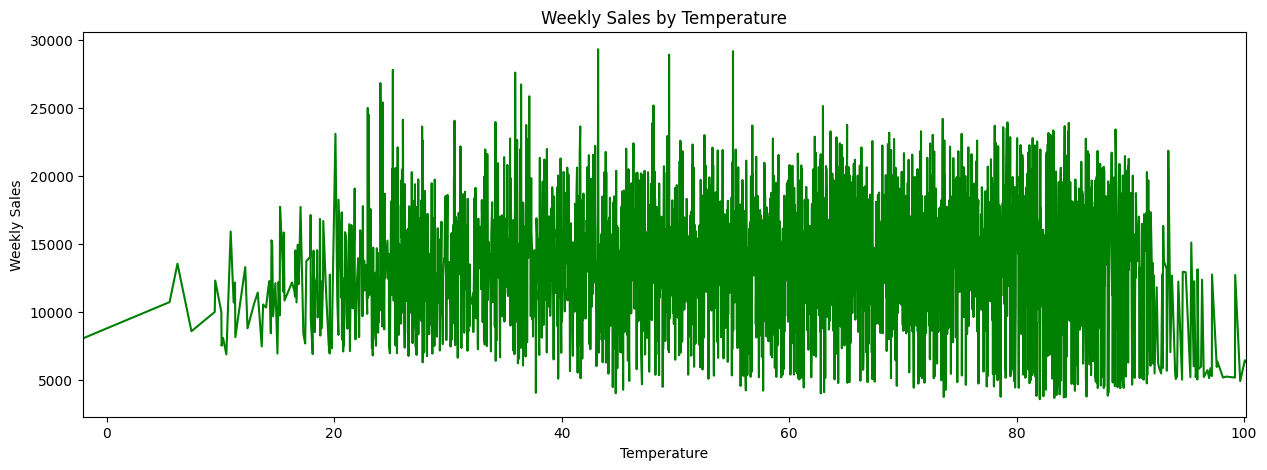

In [132]:
plt.figure(figsize = (15, 5))

sns.lineplot(y = 'Weekly_Sales', x = 'Temperature', data = train_data, ci = None, color = 'green')

plt.grid(False)
plt.title('Weekly Sales by Temperature')
plt.ylabel('Weekly Sales')
plt.xlim(train_data['Temperature'].min(), train_data['Temperature'].max())

Weekly_Sales vs. Fuel_Price

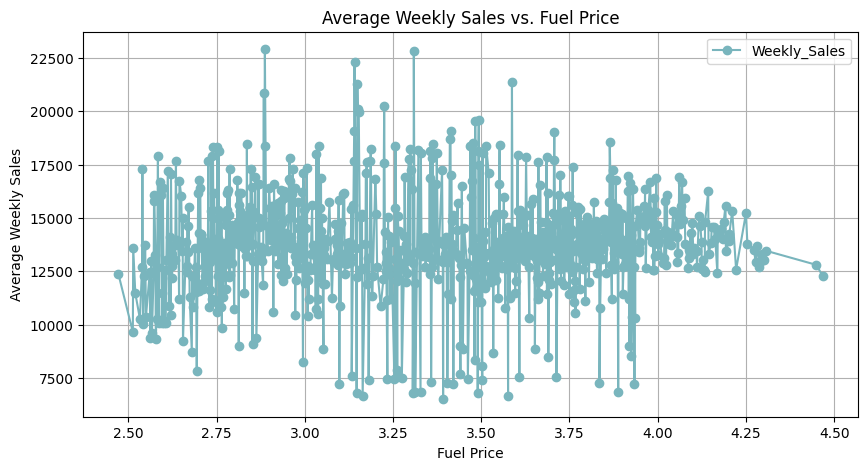

In [133]:
fuel_price = pd.pivot_table(
    train_data,
    values="Weekly_Sales",
    index="Fuel_Price",
    aggfunc='mean'   
)

# Plot
fuel_price.plot(figsize=(10, 5), color='#79B5BD', marker='o')
plt.title('Average Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

Weekly Sales vs. CPI

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\2258949796.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


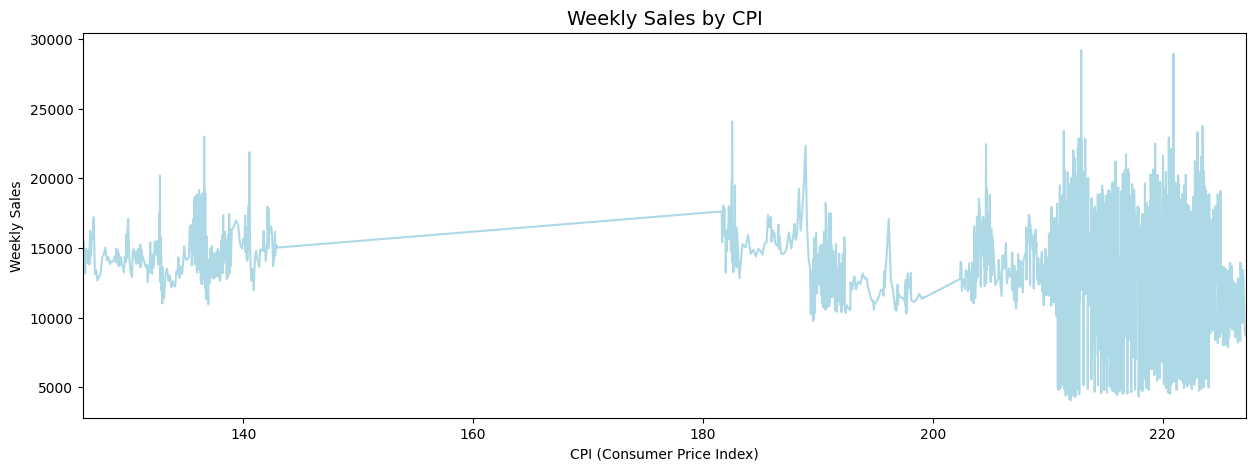

In [ ]:
plt.figure(figsize=(15, 5))




sns.lineplot(
    data=train_data,
    x='CPI',
    y='Weekly_Sales',
    ci=None,
    color='lightblue'
)

plt.title('Weekly Sales by CPI', fontsize=14)
plt.xlabel('CPI (Consumer Price Index)')
plt.ylabel('Weekly Sales')

plt.grid(False)
plt.xlim(train_data['CPI'].min(), train_data['CPI'].max())
plt.show()

Weekly_Sales vs. Unemployment

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\1980835773.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Unemployment', y = 'Weekly_Sales', data = train_data, ci = None, color = '#42F3AD')


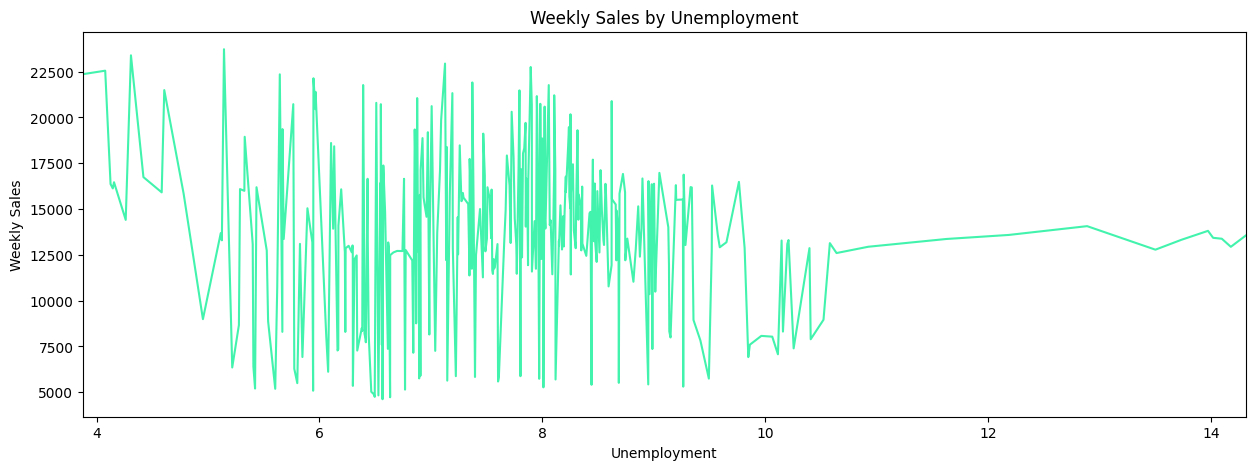

In [ ]:
plt.figure(figsize = (15, 5))

sns.lineplot(x = 'Unemployment', y = 'Weekly_Sales', data = train_data, ci = None, color = '#42F3AD')

plt.grid(False)
plt.title('Weekly Sales by Unemployment')
plt.ylabel('Weekly Sales')

plt.xlim(train_data['Unemployment'].min(), train_data['Unemployment'].max());

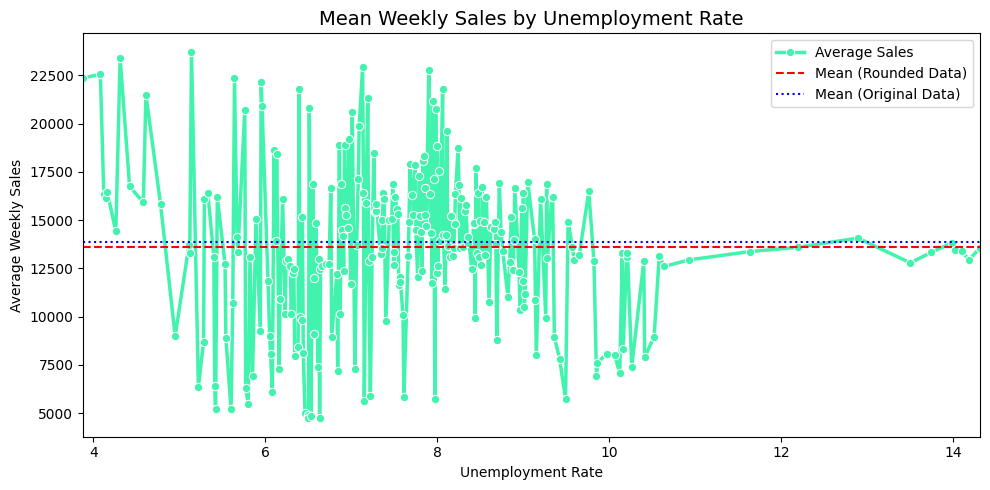

In [ ]:
ByUnemployment = (
    train_data.round(2)
    .groupby('Unemployment', as_index=False)['Weekly_Sales']
    .mean()
)

plt.figure(figsize=(10, 5))




sns.lineplot(
    data=ByUnemployment,
    x='Unemployment',
    y='Weekly_Sales',
    color='#42F3AD',
    linewidth=2.5,
    marker='o',
    label='Average Sales'
)

plt.axhline(
    y=ByUnemployment['Weekly_Sales'].mean(),
    color='r',
    linestyle='--',
    linewidth=1.5,
    label='Mean (Rounded Data)'
)

plt.axhline(
    y=train_data['Weekly_Sales'].mean(),
    color='b',
    linestyle=':',
    linewidth=1.5,
    label='Mean (Original Data)'
)

plt.title('Mean Weekly Sales by Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate')
plt.ylabel('Average Weekly Sales')
plt.legend(loc='upper right')
plt.grid(False)
plt.xlim(ByUnemployment['Unemployment'].min(), ByUnemployment['Unemployment'].max())
plt.tight_layout()
plt.show()

### 3. Data Preprocessing

In [137]:
train_data.head()

,Store,Dept,Type,Size,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,week,month,year
Date,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,A,151315,False,24924.50,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,5,2,2010
2010-02-12,1,1,A,151315,True,46039.49,38.51,2.548,211.242170,8.106,0.0,0.0,0.0,0.0,0.0,6,2,2010
2010-02-19,1,1,A,151315,False,41595.55,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,0.0,7,2,2010
2010-02-26,1,1,A,151315,False,19403.54,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,0.0,8,2,2010
2010-03-05,1,1,A,151315,False,21827.90,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0.0,9,3,2010


In [138]:
train_data.reset_index(inplace=True)

time features :

In [ ]:
#train_data['Day'] = train_data['Date'].dt.day
#train_data['Quarter'] = train_data['Date'].dt.quarter
#train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek  
#train_data['IsWeekend'] = train_data['DayOfWeek'].isin([5,6]).astype(int)

lag and rolling features : 

In [140]:
# Sort data for lag calculation
train_data = train_data.sort_values(['Store','Dept','Date'])

# Create lag features: 1 week, 2 weeks, 3 weeks
for lag in [1,2,3,4]:
    train_data[f'Weekly_Sales_lag_{lag}'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(lag)

In [ ]:
# Rolling means: 4-week and 12-week
train_data['Rolling_Mean_4'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean()
train_data['Rolling_Mean_12'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=12).mean()


In [ ]:
# Rolling Window Features
for window in [7, 14, 28]:
    train_data[f'rolling_mean_{window}'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=window).mean()
    train_data[f'rolling_std_{window}'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=window).std()
    
    train_data[f'rolling_min_{window}'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=window).min()
    train_data[f'rolling_max_{window}'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(window=window).max()

In [142]:
# Example: is this week near a holiday? (within ±1 week)
train_data['IsHoliday_Near'] = train_data.groupby(['Store','Dept'])['IsHoliday'].shift(1).fillna(0) | \
                                 train_data['IsHoliday'] | \
                                 train_data.groupby(['Store','Dept'])['IsHoliday'].shift(-1).fillna(0)

In [ ]:
for span in [5, 10, 20]:
    train_data[f'ewm_{span}'] = train_data['Weekly_Sales'].ewm(span=span).mean()

# Expanding Window Features
train_data['expanding_mean'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).expanding().mean()
train_data['expanding_std'] = train_data.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).expanding().std()

In [145]:
train_data.isnull().sum().sum()

np.int64(700248)

In [146]:
train_data.fillna(method='ffill', inplace=True)
train_data.fillna(method='bfill', inplace=True)
df = train_data.copy()

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\912374224.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\912374224.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='bfill', inplace=True)


In [147]:
df = df.sort_values(['Store', 'Dept', 'Date'])

In [160]:
type_group = {'A':1, 'B': 2, 'C': 3} 
df['Type'] = df['Type'].replace(type_group)

C:\Users\ELFEEL\AppData\Local\Temp\ipykernel_13908\805102020.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'] = df['Type'].replace(type_group)


In [161]:
cutoff_date = df['Date'].max() - pd.DateOffset(weeks=12)

In [162]:
train_set = df[df['Date'] <= cutoff_date].copy()
val_set = df[df['Date'] > cutoff_date].copy()

In [163]:
print("Train set shape:", train_set.shape)
print("Test set shape:", val_set.shape)
print("Train date range:", train_set['Date'].min(), "to", train_set['Date'].max())
print("Test date range:", val_set['Date'].min(), "to", val_set['Date'].max())

Train set shape: (377846, 47)
Test set shape: (34876, 47)
Train date range: 2010-02-05 00:00:00 to 2012-08-03 00:00:00
Test date range: 2012-08-10 00:00:00 to 2012-10-26 00:00:00


In [164]:
X_train = train_set.drop(columns=['Date', 'Weekly_Sales'])
y_train = train_set['Weekly_Sales']

X_val = val_set.drop(columns=['Date', 'Weekly_Sales'])
y_val = val_set['Weekly_Sales']

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
# Scaling training and testng set using MinMax Scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [168]:
lr.score(X_train, y_train)*100, lr.score(X_val, y_val)*100

(99.9308969386021, 99.98107128811338)

In [169]:
y_pred_lr = lr.predict(X_val)

In [170]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [171]:
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Performance:
RMSE: 232.35
MAE: 128.13
R² Score: 0.9998


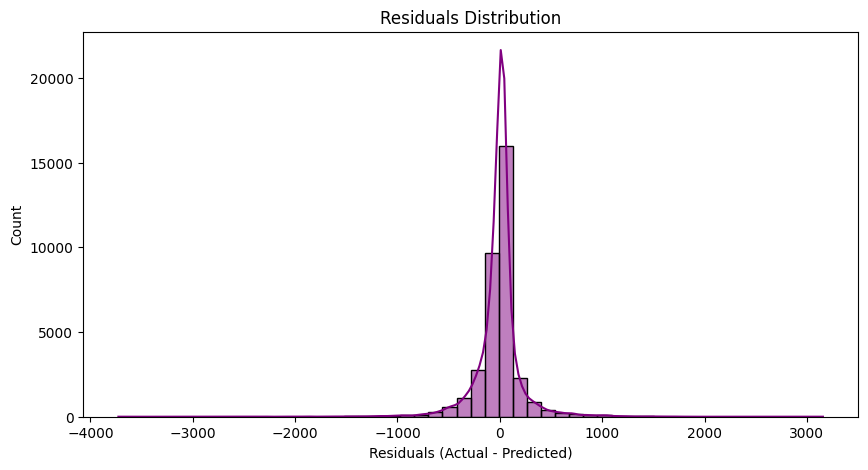

In [ ]:
residuals = y_val - y_pred_lr

plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

6.5 Actual vs Predicted Weekly Sales on test data

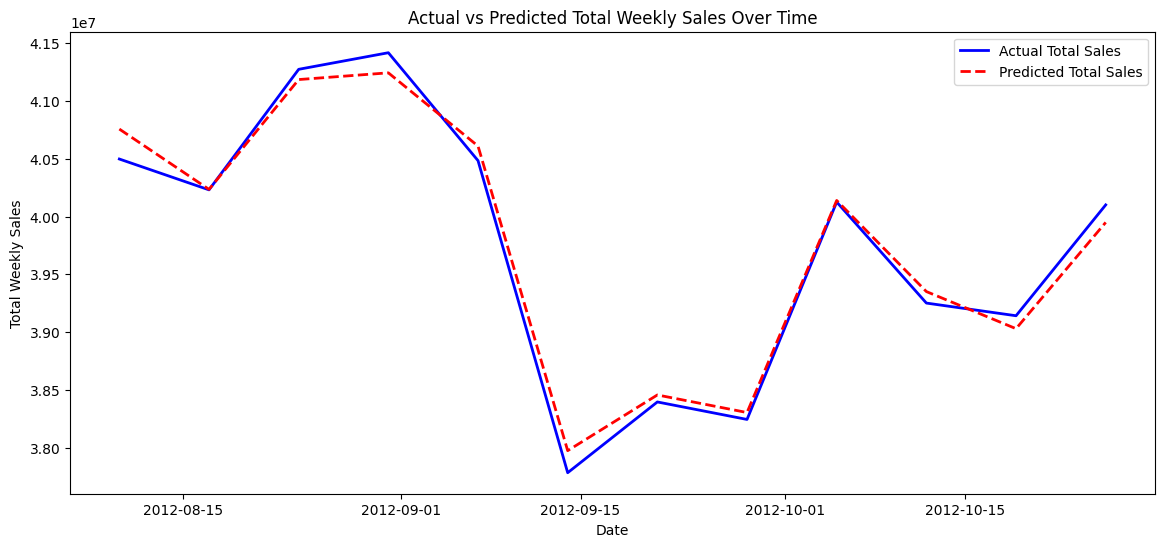

In [ ]:
plot_df = val_set[['Date']].copy()
plot_df['Actual'] = y_val.values
plot_df['Predicted'] = y_pred_lr

weekly_totals = plot_df.groupby('Date')[['Actual','Predicted']].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(weekly_totals['Date'], weekly_totals['Actual'], label='Actual Total Sales', color='blue', linewidth=2)
plt.plot(weekly_totals['Date'], weekly_totals['Predicted'], label='Predicted Total Sales', color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.legend()
plt.show()

In [174]:
import joblib
import os

# Create a folder to save models
os.makedirs("models", exist_ok=True)

# Save the scaler
joblib.dump(scaler, "models/minmax_scaler.pkl")

joblib.dump(lr, "models/linear_regression.pkl")

print("Scaler and models saved successfully!")

Scaler and models saved successfully!
